In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-25-03-22_BanditNonStaticGradual_/BanditNonStaticGradual.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
0,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,50.62,0.2363,0
1,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,50.87,0.1899,1
2,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,49.84,0.1946,2
3,CUCB,GradualGenerator-100,KL-1-100-0.6,99.93,50.09,0.1741,3
4,CUCB,GradualGenerator-100,KL-1-100-0.6,99.55,50.97,0.1826,4


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCB-ADWIN-0.1',
 'CUCBm',
 'Exp3.M',
 'Exp3.M-ADWIN-0.1',
 'IMP-TS',
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-KLUCB',
 'MP-KLUCB-ADWIN-0.1',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0',
 'OR',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata.shape

(3100000, 8)

In [7]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

,,gain,k,reward/arm
bandit,scalingstrategy,,,
CUCB,KL-1-100-0.6,24.726488,44.848677,0.560693
CUCB-ADWIN-0.1,KL-1-100-0.6,26.560943,44.501982,0.584843
CUCBm,KL-1-100-0.6,24.689940,44.813154,0.560288
Exp3.M,KL-1-100-0.6,0.636209,1.518125,0.405912
Exp3.M-ADWIN-0.1,KL-1-100-0.6,3.597088,6.438885,0.409041
IMP-TS,KL-1-100-0.6,24.609571,44.734295,0.559532
MP-DTS; g=0.7,KL-1-100-0.6,18.308916,31.027095,0.537001
MP-DTS; g=0.8,KL-1-100-0.6,20.431909,34.376069,0.539417
MP-DTS; g=0.9,KL-1-100-0.6,22.628588,37.870255,0.544152


In [8]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06
mean,4.149900e+01,2.319553e+01,6.506530e-01,4.999950e+04,5.415583e-01
std,2.382210e+01,1.374993e+01,8.221195e-01,2.886752e+04,9.437904e-02
min,1.020000e+00,1.200000e-01,3.380000e-02,0.000000e+00,1.008403e-01
25%,2.687000e+01,1.398000e+01,3.012000e-01,2.499975e+04,4.836066e-01
50%,4.123000e+01,2.203000e+01,3.918000e-01,4.999950e+04,5.821518e-01
75%,6.147000e+01,3.455000e+01,6.263000e-01,7.499925e+04,6.022786e-01
max,1.000000e+02,5.115000e+01,7.185430e+01,9.999900e+04,7.115385e-01


In [9]:
masterdata['dataset'].unique()

array(['GradualGenerator-100'], dtype=object)

In [10]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.6'], dtype=object)

In [11]:
delta = 0.6
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [12]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration', 'reward/arm'],
      dtype='object')

In [13]:
data.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration,reward/arm
0,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,50.62,0.2363,0,0.506200
1,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,50.87,0.1899,1,0.508700
2,CUCB,GradualGenerator-100,KL-1-100-0.6,100.00,49.84,0.1946,2,0.498400
3,CUCB,GradualGenerator-100,KL-1-100-0.6,99.93,50.09,0.1741,3,0.501251
4,CUCB,GradualGenerator-100,KL-1-100-0.6,99.55,50.97,0.1826,4,0.512004


In [14]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.560693,0.091791,0.351846,0.484286,0.571544,0.651771,0.692558
CUCB-ADWIN-0.1,100000.0,0.584843,0.042911,0.150442,0.588295,0.596921,0.602261,0.644876
CUCBm,100000.0,0.560288,0.091397,0.351846,0.484286,0.571390,0.650586,0.691644
Exp3.M,100000.0,0.405912,0.100208,0.118644,0.327044,0.403226,0.478723,0.711538
Exp3.M-ADWIN-0.1,100000.0,0.409041,0.105962,0.100840,0.325397,0.402778,0.483221,0.655870
IMP-TS,100000.0,0.559532,0.091297,0.352353,0.484077,0.570729,0.649556,0.692447
MP-DTS; g=0.7,100000.0,0.537001,0.078577,0.323944,0.468933,0.560375,0.599770,0.673992
MP-DTS; g=0.8,100000.0,0.539417,0.079485,0.309133,0.466321,0.584898,0.602760,0.657772
MP-DTS; g=0.9,100000.0,0.544152,0.083696,0.273684,0.462733,0.593347,0.603394,0.640872


In [15]:
n = 100000
steps = np.array([((x+1)*n)/(61)for x in range(60)])

a = list(range(31))
b = list(range(30))
b.reverse()
stepstates = a + b

pullref = []
for x in range(n):
    currentstep = len(steps[steps < x])
    pullref = pullref + [80 - 2*stepstates[currentstep]]

In [16]:
top =0.9966666666666667
low =0.5016666666666666
expected_gains = []
for stepstate in stepstates: 
    expected_gains = expected_gains + [np.linspace(top-0.01*stepstate,low-0.01*stepstate,9901)]

In [17]:
husl5 = sns.color_palette("husl", 5)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [18]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M.auto', 
             'Exp3.M.auto-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "CUCB": "S-CUCB",
    "CUCB-ADWIN-0.1": "S-CUCB-ADWIN",
    "Exp3.M.auto": "S-Exp3.M",
    "Exp3.M.auto-ADWIN-0.1": "S-Exp3.M-ADWIN",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCB-ADWIN-0.1': "S-KL-UCB-ADWIN",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
}

styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M.auto' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M.auto-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


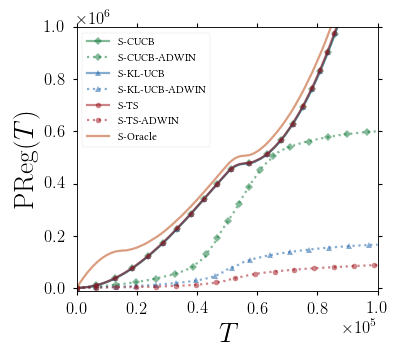

CUCB : 1514445.0
CUCB-ADWIN-0.1 : 600511.63
MP-KLUCB : 1520297.94
MP-KLUCB-ADWIN-0.1 : 165542.01
MP-TS : 1533538.02
MP-TS-ADWIN-0.1 : 87452.44
OR : 4913238.46
OS : 1596089.31


In [19]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[data["bandit"].isin(shortlist)].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=1, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("gradual_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


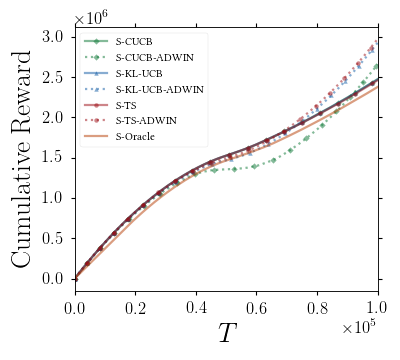

CUCB : 2472648.76
CUCB-ADWIN-0.1 : 2656094.27
MP-KLUCB : 2469073.3
MP-KLUCB-ADWIN-0.1 : 2924545.73
MP-TS : 2458871.51
MP-TS-ADWIN-0.1 : 2971123.53
OR : 51755.54
OS : 2375830.67


In [20]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[data["bandit"].isin(shortlist)].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, 
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative~Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("gradual_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


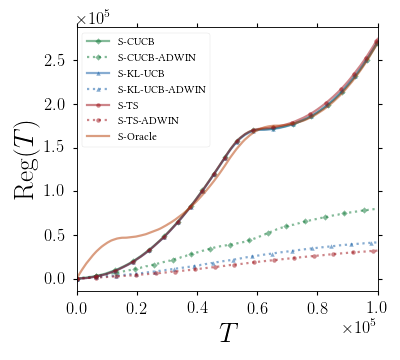

CUCB : 270212.666984
CUCB-ADWIN-0.1 : 79805.8583693
MP-KLUCB : 271069.360329
MP-KLUCB-ADWIN-0.1 : 41339.0882645
MP-TS : 274372.490562
MP-TS-ADWIN-0.1 : 31946.108888
OR : 63727.2483243
OS : 269691.443303


In [19]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[data["bandit"].isin(shortlist)].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("gradual_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


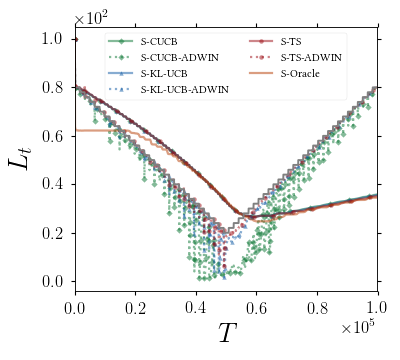

CUCB : 44.848676799998245
CUCB-ADWIN-0.1 : 44.50198249999947
MP-KLUCB : 44.81540780000097
MP-KLUCB-ADWIN-0.1 : 48.87059909999963
MP-TS : 44.708739799997794
MP-TS-ADWIN-0.1 : 49.684210200000564
OR : 1.365112399999896
OS : 41.81366950000785


In [23]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='best')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("gradual_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


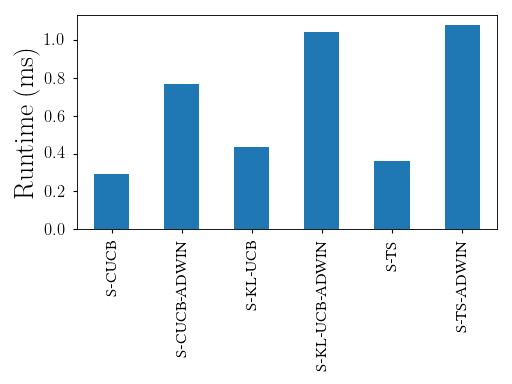

In [23]:
%matplotlib notebook

algs = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M.auto', 
             'Exp3.M.auto-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("gradual_Runtime_%s.pdf"%plotkind)

<IPython.core.display.Javascript object>


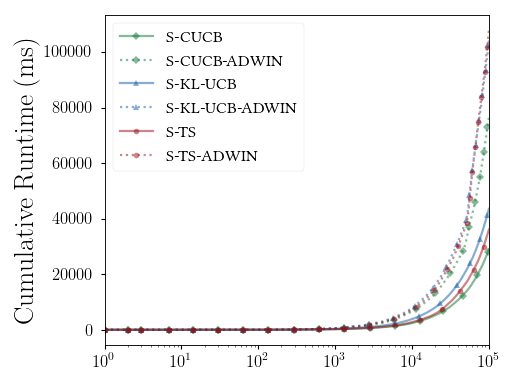

In [24]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Cumulative~Runtime~(ms)}$")
    plt.legend()
    
plt.tight_layout()
plt.savefig("gradual_CumulativeRuntime_%s.pdf"%plotkind)

# Extended analysis (with competitors)

In [29]:
plotkind = "long"

shortlist = [
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0'
]

prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-OS",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-dTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-dTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-dTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-dTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
     'MP-DTS; g=0.7': {'marker': 'p', 'color': blues5[0], 'linestyle': "-"},
     'MP-DTS; g=0.8': {'marker': 'p', 'color': blues5[1], 'linestyle': "-"},
     'MP-DTS; g=0.9': {'marker': 'p', 'color': blues5[2], 'linestyle': "-"},  
     'MP-DTS; g=0.99': {'marker': 'p', 'color': blues5[3], 'linestyle': "-"},
    
     'MP-EG; e=0.7': {'marker': 'P', 'color': purples5[0], 'linestyle': "-"},
     'MP-EG; e=0.8': {'marker': 'P', 'color': purples5[1], 'linestyle': "-"},
     'MP-EG; e=0.9': {'marker': 'P', 'color': purples5[2], 'linestyle': "-"},
     'MP-EG; e=0.99': {'marker': 'P', 'color': purples5[3], 'linestyle': "-"},

     'MP-SWUCB; w=50': {'marker': 's', 'color': greens5[0], 'linestyle': "-"},
     'MP-SWUCB; w=100': {'marker': 's', 'color': greens5[1], 'linestyle': "-"},
     'MP-SWUCB; w=500': {'marker': 's', 'color': greens5[2], 'linestyle': "-"},
     'MP-SWUCB; w=1000': {'marker': 's', 'color': greens5[3], 'linestyle': "-"},
     
    
     'MP-TS-ADWIN-0.001': {'marker': 'o', 'color': reds5[5], 'linestyle': "-"},
     'MP-TS-ADWIN-0.01': {'marker': 'o', 'color': reds5[4], 'linestyle': "-"},
     'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[3], 'linestyle': "-"},
     'MP-TS-ADWIN-0.3': {'marker': 'o', 'color': reds5[2], 'linestyle': "-"},
     'MP-TS-ADWIN-0.5': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
     'MP-TS-ADWIN-1.0': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    
     'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
     'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


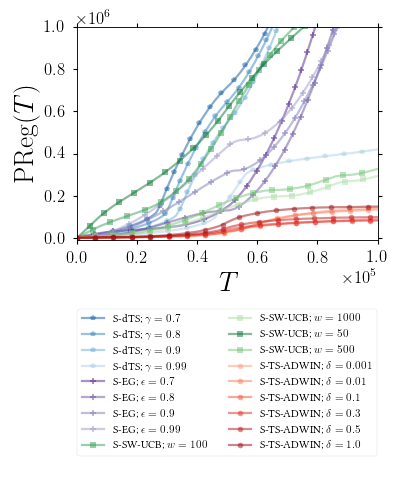

MP-DTS; g=0.7 : 1947137.2
MP-DTS; g=0.8 : 1612286.11
MP-DTS; g=0.9 : 1263026.16
MP-DTS; g=0.99 : 419778.49
MP-EG; e=0.7 : 2217896.78
MP-EG; e=0.8 : 1764756.46
MP-EG; e=0.9 : 1601145.88
MP-EG; e=0.99 : 1523220.45
MP-SWUCB; w=100 : 1377362.46
MP-SWUCB; w=1000 : 294196.86
MP-SWUCB; w=50 : 1445066.29
MP-SWUCB; w=500 : 327206.19
MP-TS-ADWIN-0.001 : 142097.87
MP-TS-ADWIN-0.01 : 134409.83
MP-TS-ADWIN-0.1 : 87452.44
MP-TS-ADWIN-0.3 : 82407.1
MP-TS-ADWIN-0.5 : 98111.39
MP-TS-ADWIN-1.0 : 148780.05


In [37]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("gradual_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


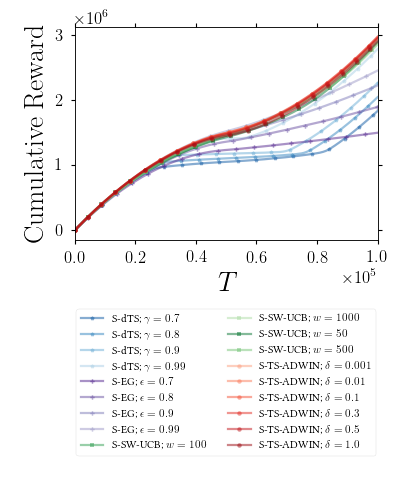

MP-DTS; g=0.7 : 1830891.6
MP-DTS; g=0.8 : 2043190.87
MP-DTS; g=0.9 : 2262858.8
MP-DTS; g=0.99 : 2781382.09
MP-EG; e=0.7 : 1497161.36
MP-EG; e=0.8 : 1893725.03
MP-EG; e=0.9 : 2222176.01
MP-EG; e=0.99 : 2451015.62
MP-SWUCB; w=100 : 2938450.05
MP-SWUCB; w=1000 : 2878934.94
MP-SWUCB; w=50 : 2888370.69
MP-SWUCB; w=500 : 2853256.67
MP-TS-ADWIN-0.001 : 2942139.31
MP-TS-ADWIN-0.01 : 2946102.32
MP-TS-ADWIN-0.1 : 2971123.53
MP-TS-ADWIN-0.3 : 2966357.8
MP-TS-ADWIN-0.5 : 2948998.62
MP-TS-ADWIN-1.0 : 2900159.52


In [38]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative~Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("gradual_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


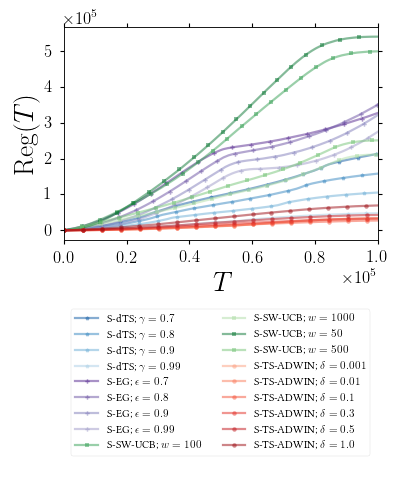

MP-DTS; g=0.7 : 213045.439128
MP-DTS; g=0.8 : 157938.865391
MP-DTS; g=0.9 : 105188.967314
MP-DTS; g=0.99 : 47749.0924002
MP-EG; e=0.7 : 326826.80171
MP-EG; e=0.8 : 349983.375075
MP-EG; e=0.9 : 321124.731001
MP-EG; e=0.99 : 274306.870631
MP-SWUCB; w=100 : 498792.673004
MP-SWUCB; w=1000 : 211310.965349
MP-SWUCB; w=50 : 539693.35539
MP-SWUCB; w=500 : 250680.784068
MP-TS-ADWIN-0.001 : 34394.2041596
MP-TS-ADWIN-0.01 : 32595.6761433
MP-TS-ADWIN-0.1 : 27311.6284671
MP-TS-ADWIN-0.3 : 32919.9158096
MP-TS-ADWIN-0.5 : 42866.4879637
MP-TS-ADWIN-1.0 : 69326.9893589


In [40]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("gradual_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


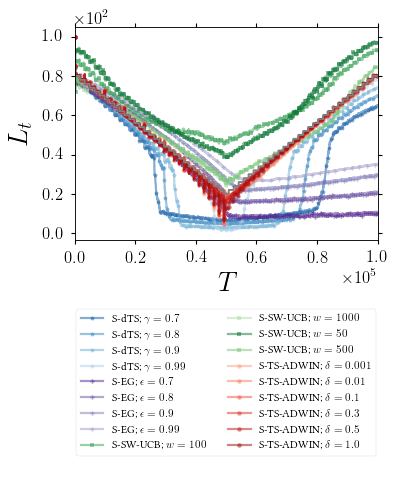

MP-DTS; g=0.7 : 31.027094799999983
MP-DTS; g=0.8 : 34.37606890000026
MP-DTS; g=0.9 : 37.8702551999996
MP-DTS; g=0.99 : 46.338650100001985
MP-EG; e=0.7 : 28.3209721999996
MP-EG; e=0.8 : 35.29768699999985
MP-EG; e=0.9 : 40.835777599999524
MP-EG; e=0.99 : 44.57577730000048
MP-SWUCB; w=100 : 64.25124459999995
MP-SWUCB; w=1000 : 51.860659000001235
MP-SWUCB; w=50 : 64.93986730000066
MP-SWUCB; w=500 : 52.304149700000266
MP-TS-ADWIN-0.001 : 49.145411499999156
MP-TS-ADWIN-0.01 : 49.21902989999847
MP-TS-ADWIN-0.1 : 49.684210200000564
MP-TS-ADWIN-0.3 : 49.730781800001104
MP-TS-ADWIN-0.5 : 49.58440049999941
MP-TS-ADWIN-1.0 : 49.14544029999924


In [41]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::20]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("gradual_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


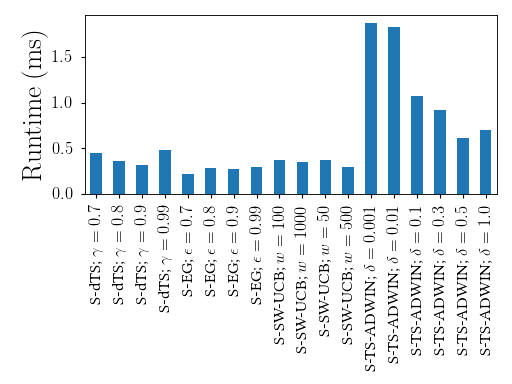

In [42]:
%matplotlib notebook

algs = [

 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=500',
 'MP-SWUCB; w=1000',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("gradual_Runtime_%s.pdf"%plotkind)

<IPython.core.display.Javascript object>


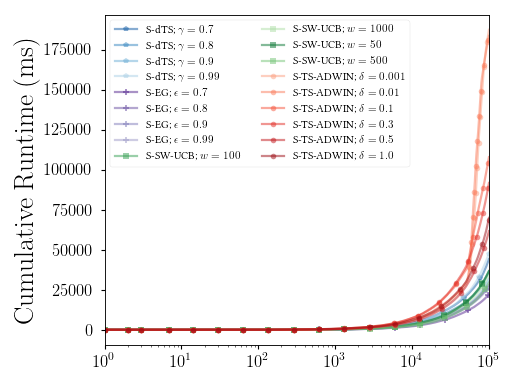

In [43]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Cumulative~Runtime~(ms)}$")
    plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.savefig("gradual_CumulativeRuntime_%s.pdf"%plotkind)